# Code for SwDS dissertation 2
#### This file contains code for EDA (Section 1)

#### Yilun Dong (s1994256), August/2020

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# original data frames from the csv file
train_original = pd.read_csv('quora_train.csv')
test_original = pd.read_csv('quora_test.csv')

# check nan
nan_rows_train = train_original[train_original.isnull().any(1)]
print('Train:', nan_rows_train)

nan_rows_test = test_original[test_original.isnull().any(1)]
print('Test:', nan_rows_test)

Train:         Unnamed: 0      id    qid1    qid2                       question1  \
182601      105796  105796  209841  209842  How can I develop android app?   
219751      363416  363416  711434  711435                             NaN   

                                                question2  is_duplicate  
182601                                                NaN             0  
219751  My Chinese name is Haichao Yu. What English na...             0  
Test:       Unnamed: 0      id    qid1    qid2                         question1  \
1495      201871  201871  398348  398349  How can I create an Android app?   

     question2  is_duplicate  
1495       NaN             0  


In [3]:
# drop nan rows
train = train_original.drop([train_original.index[182601] , train_original.index[219751]])
test = test_original.drop([test_original.index[1495]])

print('The length of the training data is', len(train))
print('The length of the test data is', len(test))

The length of the training data is 323478
The length of the test data is 80870


In [4]:
# recurrent questions
qids_train = pd.Series(train['qid1'].tolist() + train['qid2'].tolist())
qids_count_train = qids_train.value_counts().to_frame()
qids_count_train.columns = ['count']
num_rec_questions_train = np.sum(qids_count_train['count'] > 1)
print('Types of recurrent questions in the training set:', num_rec_questions_train)
print('Proportion of recurrent questions in the training set:', num_rec_questions_train/len(qids_count_train))

i = 0
for number in qids_count_train['count']:
    if number > 1:
        i += number
print('Total number of recurrent questions in the training set:', i)        
print('Proportion of total number of recurrent questions in the training set:', (i/len(qids_train)))

Types of recurrent questions in the training set: 9530
Proportion of recurrent questions in the training set: 0.015028867094666092
Total number of recurrent questions in the training set: 22373
Proportion of total number of recurrent questions in the training set: 0.03458194993168005


In [5]:
# identical pairs (by question IDs)
pairs_train = train.groupby(['qid1', 'qid2']).size().to_frame()
pairs_train.columns = ['count']
pairs_train.sort_values(['count'])

,,count
qid1,qid2,
1,2,1
523024,523025,1
523020,523021,1
523018,523019,1
523016,523017,1
...,...,...
258814,258815,1
258834,258835,1
789800,789801,1


In [6]:
# identical pairs (by pair IDs)
pairs_train_2 = train.groupby(['id']).size().to_frame()
pairs_train_2.columns = ['count']
pairs_train_2.sort_values(['count'])

,count
id,
0,1
269466,1
269465,1
269464,1
269463,1
...,...
134817,1
134816,1
134815,1


In [7]:
# check potential identical pairs of the training set
train.loc[train['qid1'] == 410323]

,Unnamed: 0,id,qid1,qid2,question1,question2,is_duplicate
86872,208000,208000,410323,410324,"Who were Jacobins, and why are they important?","Who were Jacobins, and why are they important/",1
315771,403565,403565,410323,410324,Which biology areas have the most low-hanging ...,Which astronomy areas have the most low-hangin...,0


In [8]:
# check potential identical pairs of the training set
train.loc[train['qid1'] == 470424]

,Unnamed: 0,id,qid1,qid2,question1,question2,is_duplicate
186780,336568,336568,470424,470425,When was 2011 5th Global Shipping Summit?,Where is the 2011 5th Global Shipping Summit?,0
268491,238815,238815,470424,470425,Which flavour has been considered as the best ...,Which school of economic thought is considered...,0


In [9]:
# number of positives and negatives in the training set
duplication_count_train = train['is_duplicate'].value_counts()
duplication_count_test = test['is_duplicate'].value_counts()

print('Number of positives and negatives in the training set:\n', duplication_count_train)
print('Proportion of positives in the training set:', 
      duplication_count_train[1]/(duplication_count_train[0] + duplication_count_train[1]), 
      '\n')
print('Proportion of negatives in the training set:', 
      duplication_count_train[0]/(duplication_count_train[0] + duplication_count_train[1]), 
      '\n')

Number of positives and negatives in the training set:
 0    203851
1    119627
Name: is_duplicate, dtype: int64
Proportion of positives in the training set: 0.3698149487754963 

Proportion of negatives in the training set: 0.6301850512245036 



The longest question in the training set has 237 words.
The shortest question in the training set has 1 words.


(array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14]),
 <a list of 8 Text yticklabel objects>)

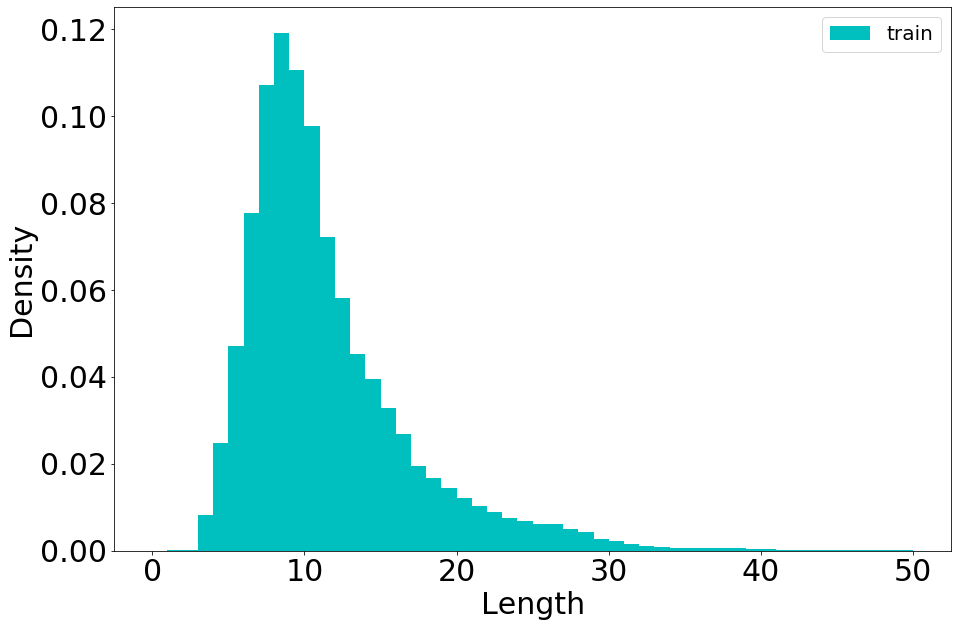

In [10]:
# question length
questions_train = pd.Series(train['question1'].tolist() + train['question2'].tolist()).astype(str)

length_train = questions_train.apply(lambda x: len(x.split(' ')))

print('The longest question in the training set has', length_train.max(), 'words.')
print('The shortest question in the training set has', length_train.min(), 'words.')

plt.figure(figsize=(15, 10))
plt.hist(length_train, bins = 50, range = [0, 50], 
         density = True, color = 'c', label = 'train')
plt.xlabel('Length', fontsize = 30)
plt.ylabel('Density', fontsize = 30)
plt.legend(fontsize = 20)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)

In [11]:
# occurences of numbers in the questions
questions_with_numbers = np.mean(questions_train.apply(lambda x: max([y.isdigit() for y in x])))
print('Proportion of questions with numbers in the training set:', questions_with_numbers)

Proportion of questions with numbers in the training set: 0.1180884016841949
